#####Important Note:


DO NOT hit run all as it will take a significant amount of time especially when building the models..
--> one can navigate through the sections with ease through the side-bar:
- <img src='https://drive.google.com/uc?id=1o1H6weAaYYRZCPGMj529NiVg4H84I5dX' width=40% height=40%>


--> run each section iteratively -> i.e.
  - minimize a section (e.g. > Data Exploration)
  - then click the play button

- <img src="https://drive.google.com/uc?id=10-Mqpr1tc4vn3qlWi9bHL9K760LT7tOV">


--> ONLY run the sections for the model versions if you are trying to build a better version for a specific model type: 

(i.e. custom, prebuilt--Inception, prebuilt--ResNET, prebuilt--VGG, etc..)

In [ ]:
#install openCV for image processing...
!pip install opencv-python

#### Data Exploration:

In [1]:
'''
IMPORT FUNCTIONS
'''

import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import os
import tensorflow as tf
import matplotlib.pyplot as plt

#from google.colab import drive 
#drive.mount('/content/gdrive')


In [10]:
# Comment out when not using google collab
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow import random
np.random.seed(22)
random.set_seed(22)

In [ ]:
# make sure to add the shortcut for "SIC Group Project" to your gdrive
# such that this commands works for you...
!ls gdrive/MyDrive/SIC\ Group\ Project/

ls: cannot access 'gdrive/MyDrive/SIC Group Project/': No such file or directory


In [11]:
import pandas as pd 
train_df = pd.read_csv('/content/drive/MyDrive/SIC Group Project/sign_mnist_test.csv')
test_df = pd.read_csv('/content/drive/MyDrive/SIC Group Project/sign_mnist_test.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
labels = test_df['label']

In [ ]:
labels[:5]

0     6
1     5
2    10
3     0
4     3
Name: label, dtype: int64

In [ ]:
#get dataframe shape
shape = train_df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])
shape = test_df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])
#images = 28*28 = 784 columns..


DataFrame Shape : (27455, 785)

Number of rows : 27455

Number of columns : 785

DataFrame Shape : (7172, 785)

Number of rows : 7172

Number of columns : 785


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


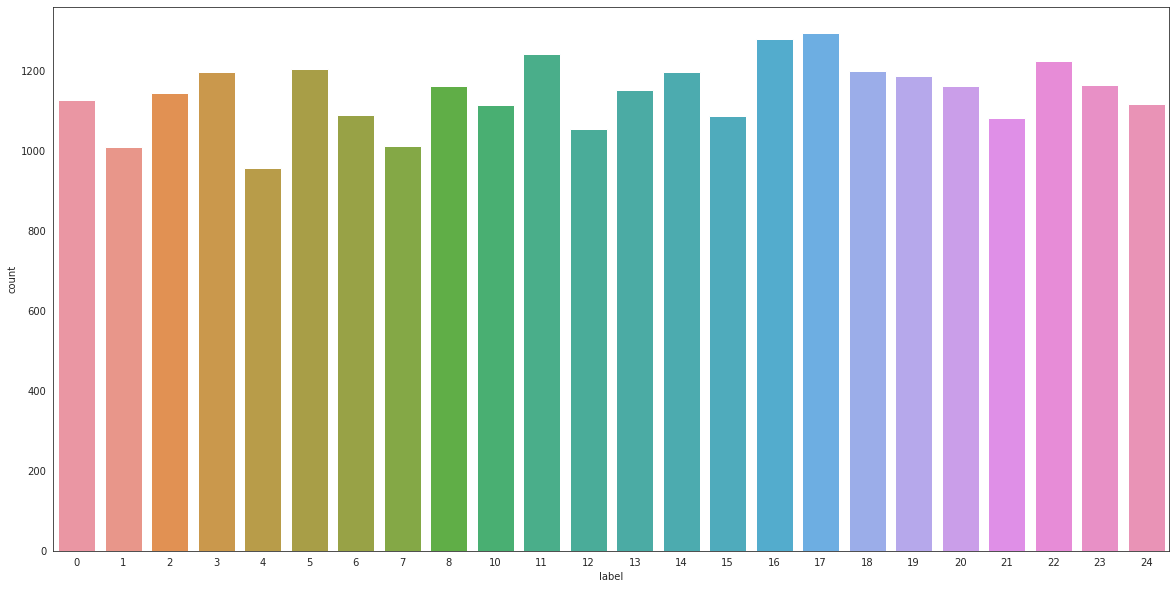

In [ ]:
# Label Count
plt.figure(figsize = (20,10)) 
sns.set_style("white")
sns.countplot(train_df['label'])

In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_df.info

<bound method DataFrame.info of        label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       

In [ ]:
# separate image and labels from the csv 
def get_image_and_label(file):
  with open(file) as f:
       # read file
       info = csv.reader(f)
       images, labels = [], []
      # print(info)
       for index, row in enumerate(info):
         #print("Index", index)
         # skip the first row
         if index==0: continue
         # put the label data into labels array
         labels.append(row[0])
         img = row[1:]

         # split the image array into 28 sub arrays
         img_arr = np.array_split(img, 28)

         #print(np.array(img).astype(float))
        # print("image array", img_list)
         images.append(img_arr)
         
         # return images array and labels array
  return np.array(images).astype(float), np.array(labels).astype(float)

In [ ]:
# Extract data from train and test csv files
training_images, training_labels = get_image_and_label('gdrive/MyDrive/SIC Group Project/sign_mnist_train.csv')
testing_images, testing_labels = get_image_and_label('gdrive/MyDrive/SIC Group Project/sign_mnist_test.csv')

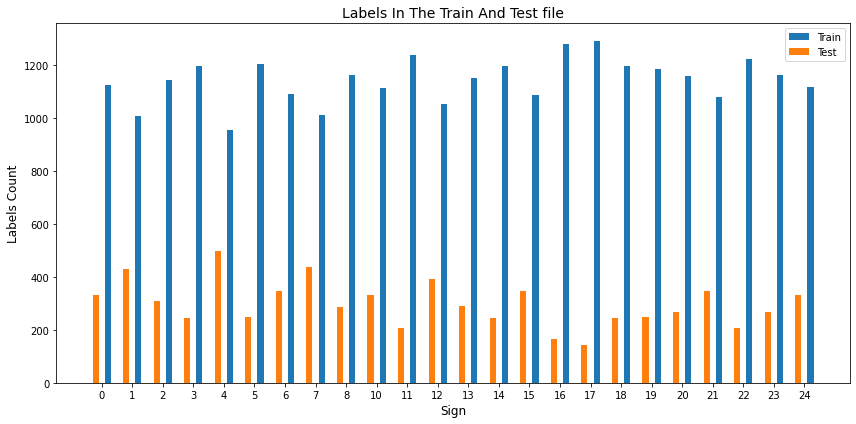

In [ ]:
# return the frequency of each label, 
def labels_frequency(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    return list(unique_labels.astype(int)), list(counts)

unique_labels_train, label_counts_train = labels_frequency(training_labels)
unique_labels_test, label_counts_test = labels_frequency(testing_labels)

# bar chart of the counts for both training and testing labels
len_labels = len(unique_labels_train)
x = np.arange(len_labels)    

fig, ax = plt.subplots(figsize=(12,6))
test = ax.bar(x+.2, label_counts_train, .2, label='Train')
train = ax.bar(x-.2, label_counts_test, .2, label='Test')

# Add text for labels, title and x-axis tick labels
ax.set_ylabel('Labels Count', fontsize=12)
ax.set_xlabel('Sign', fontsize=12)
ax.set_title('Labels In The Train And Test file', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(unique_labels_train)
ax.legend()

fig.tight_layout()

plt.show()

**************************PRINTING SOME IMAGES FROM DATASET************************


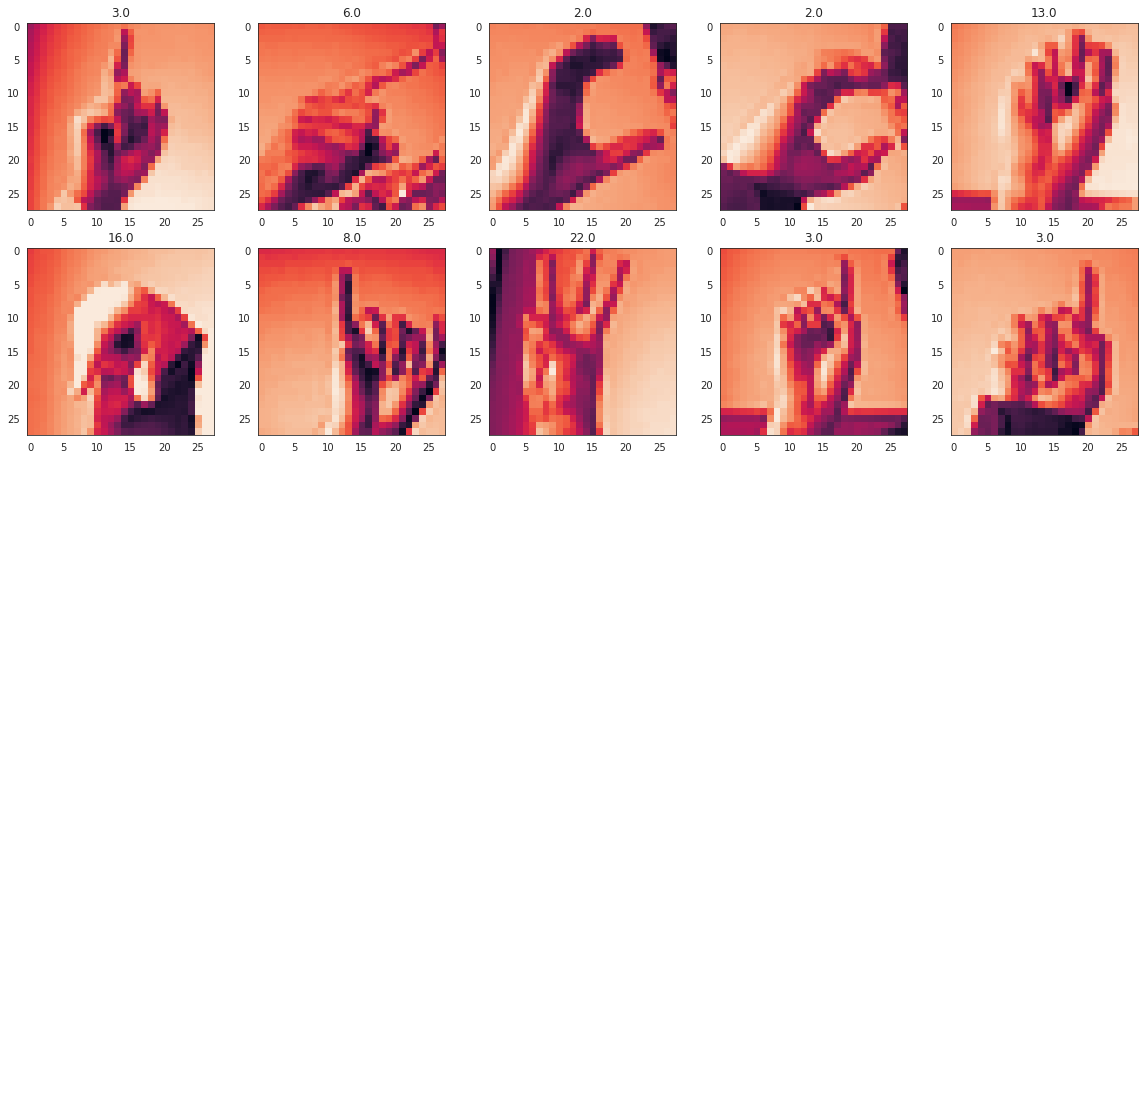

In [ ]:
#print some images 
print("**************************PRINTING SOME IMAGES FROM DATASET************************")
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
[axi.set_axis_off() for axi in axs.ravel()]
for i, image in enumerate(training_images[:10]):
    a = fig.add_subplot(5, 5, i + 1)
    plt.imshow(image)
    a.set_title(training_labels[i])

plt.show()

In [ ]:
drive.flush_and_unmount()
!ls

Drive not mounted, so nothing to flush and unmount.
sample_data


##### get train + test + validation (set aside 10% of training set)

In [ ]:
# determine if match>>>
print(train_df['label'][:5]), print(np.array(train_df['label'][:5]))

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64
[ 3  6  2  2 13]


(None, None)

In [ ]:
val_size = 0.10*len(train_df['label']) #2745.5 -> must round up..
val_size = round(val_size)
val_size

2746

In [ ]:
y_train = np.array(train_df['label']) 
y_test = np.array(test_df['label'])

In [ ]:
train_array = np.array(train_df)
test_array = np.array(test_df)

X_train = train_array[:, 1:785]
X_train = X_train.reshape((-1, 28, 28))
#
X_test = test_array[:, 1:785]
X_test = X_test.reshape((-1, 28, 28))

In [ ]:
print(X_train.shape," ",X_test.shape)

(27455, 28, 28)   (7172, 28, 28)


In [ ]:
#### set aside 2746 for validation rounded up from 2745.5
X_valid, X_train = X_train[:val_size], X_train[val_size:] 
y_valid, y_train = y_train[:val_size], y_train[val_size:]
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(2746, 28, 28)
(24709, 28, 28)
(2746,)
(24709,)


In [ ]:
print(y_test)

[ 6  5 10 ...  2  4  2]


##### Image Preprocessing

###### Image Resizing

In [ ]:
print(max(X_valid[0][0]))
print(X_valid.shape)

172
(2746, 28, 28)


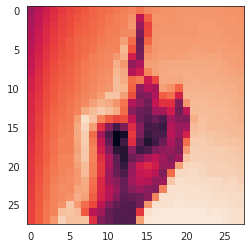

In [ ]:
plt.imshow(X_valid[0])

In [ ]:
test_ = np.empty([len(X_valid),128,128])
test_[0] = test
print(test_[0])
print(test.shape, test_.shape)

[[1.22739045e-17 1.20222827e-17 1.18784989e-17 ... 1.84246607e-17
  1.84382132e-17 1.84619301e-17]
 [1.21883012e-17 1.19314914e-17 1.17847429e-17 ... 1.84009437e-17
  1.84144963e-17 1.84382132e-17]
 [1.21393850e-17 1.18796106e-17 1.17311681e-17 ... 1.83873912e-17
  1.84009437e-17 1.84246607e-17]
 ...
 [1.58310458e-17 1.56175935e-17 1.54956207e-17 ... 2.19601762e-17
  2.19737287e-17 2.19974456e-17]
 [1.58310458e-17 1.56175935e-17 1.54956207e-17 ... 2.19601762e-17
  2.19737287e-17 2.19974456e-17]
 [1.58310458e-17 1.56175935e-17 1.54956207e-17 ... 2.19601762e-17
  2.19737287e-17 2.19974456e-17]]
(128, 128) (2746, 128, 128)


(128, 128)
1.869732586835262e-17


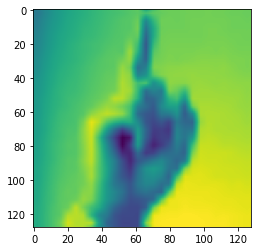

In [ ]:
# only works for grayscaled imgs not RGB imgs
from skimage import img_as_ubyte
import skimage.transform

test = skimage.transform.resize(X_valid[0], (128,128),  anti_aliasing=True)
print(test.shape)
plt.imshow(test)
print(max(test[0]))


def resize_dataset_imgs(input_img_array):

  # initialize empty array of same_size
  output_img_array = np.empty([len(input_img_array),128,128])
  for i in range(len(input_img_array)):
    # gets resized image then stores at index 'i'
    output_img_array[i] = skimage.transform.resize(input_img_array[i], [128,128], 
                                            anti_aliasing=True)
  #print(output_img_array.shape)
  return output_img_array

#X_valid = resize_dataset_imgs(X_valid)

In [ ]:
X_train = resize_dataset_imgs(X_train)
X_valid = resize_dataset_imgs(X_valid)
X_test = resize_dataset_imgs(X_test)

In [ ]:
### Normalize data:
X_mean = X_train.mean(axis=0, keepdims=True)  #takes the mean of the columns (features)
# keepdims retains the dimenson of the rows so we can subtract from the data.
X_std = X_train.std(axis=0, keepdims=True) #takes the std of the columns (features)
# Normalize the data
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [ ]:
#np.save('X_train_resized.npy', X_train)
#np.save('X_valid_resized.npy', X_valid)
#np.save('X_test_resized.npy', X_test)
!ls

sample_data  X_test_resized.npy  X_train_resized.npy  X_valid_resized.npy


In [ ]:
image_shape=(128,128,1)

In [ ]:
print(len(X_train[0][0]))

128


(24709, 128, 128)


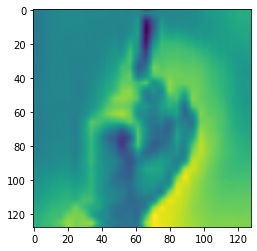

In [ ]:
print(X_train.shape)
plt.imshow(X_train[1])

In [ ]:
print(len(set(y_train)))
print(set(y_test))

24
{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}


### MODEL VERSIONS:

##### Boiler plate (imports, early-stopping)

In [ ]:
# For each Deep Layer, Factor:
  # activation units
  # normalization techniques..
  # activation function.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dropout,MaxPooling2D,Dense, Flatten, Conv2DTranspose,\
Concatenate, BatchNormalization, Activation, GlobalAveragePooling2D
from keras import Input
#from keras.utils.np_utils import to_categorical
from tensorflow.keras import callbacks, optimizers

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
# consider other pooling..
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPool2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.initializers import he_normal, lecun_normal
from tensorflow.keras.optimizers import SGD, Nadam

In [ ]:
lecun_initializer=lecun_normal(seed=13)
he_initializer=he_normal(seed=13)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# patience is the number of epochs without improvement after which the training stops (default is 0)
# min_delta is the minimum amount considered to be an improvement (default is 0 any improvement is good)
# restore_best_weights=True will save the parameters of the epoch with lowest val_loss
# patience: 10 -> 15

early_stop = EarlyStopping( monitor='val_loss', mode='min', 
                           verbose=1, patience=8, min_delta=0.001, 
                           restore_best_weights=True)

###### Evaluation Software:

In [ ]:
from tensorflow.math import confusion_matrix
import seaborn as sns

In [ ]:
from sklearn.metrics import f1_score

#### Custom-build-model: SGD

##### Model Specs:

In [ ]:
# For adding new activation function

#--> attempted to use swish; no significant 
# performance improvements on  f1_score...
"""
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def swish(x):
    return (K.sigmoid(x) * x)
get_custom_objects().update({'swish': Activation(swish)})
"""
model = Sequential()

# can have more convolutions before each pooling...
# orig kernel_sizes 5,3,3 ; filters 64,128,256
# added kernel initializer he_normal + le_cun for dense..
# convolutions and pooling
model.add(Conv2D(filters=64, kernel_size=7, 
                 activation="relu",
                 #kernel_initializer=he_initializer,
                 padding="same",
                 input_shape=image_shape) )
model.add(MaxPool2D(pool_size=(3), strides=2))

model.add(Conv2D(filters=128, kernel_size=5, 
                 activation="relu",
                 kernel_initializer=he_initializer,
                 strides=2,
                 padding="same") )

model.add(MaxPool2D(pool_size=(3), strides=2))

model.add(Conv2D(filters=256, kernel_size=3, 
                 activation="relu",
                 kernel_initializer=he_initializer,
                 strides=1,
                 padding="same") )
model.add(MaxPool2D(pool_size=(3), strides=2))

model.add(Conv2D(filters=128, kernel_size=3, 
                 activation="relu",
                 kernel_initializer=he_initializer,
                 strides=1,
                 padding="same") )
model.add(MaxPool2D(pool_size=(3), strides=2))
"""
model.add(Conv2D(filters=256, kernel_size=3, 
                 activation="relu",
                 kernel_initializer=he_initializer,
                 padding="same") )
model.add(MaxPool2D(2))
"""

#most optimal dropout rate == 0.5
# dense layers
"""
model.add(Dense(256, activation="relu"))#,
                 #kernel_initializer=he_initializer) )
model.add(Dropout(0.5))
"""
## --- ##
model.add(Flatten()) # flatten the image
"""
model.add(Dense(256, activation="relu"))#,
                 #kernel_initializer=he_initializer) )
model.add(Dropout(0.7))
"""
model.add(Dense(512, activation="relu",
                 kernel_initializer=he_initializer) )
model.add(Dropout(0.5))

model.add(Dense(256, activation="relu",
                 kernel_initializer=he_initializer) )
model.add(Dropout(0.5))

#model.add(Dense(32, activation="relu"))
#model.add(Dropout(0.5))


# output layer --> 10 classes
model.add(Dense(25, activation="softmax"))

#SGD
opt = sgd=SGD(clipnorm=1.0, momentum=0.9, decay=1.0e-6)

# -> no hot encoding ... 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
# notice there are no parameters in the pooling layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 128, 128, 64)      3200      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 32, 32, 128)       204928    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 15, 15, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 15, 15, 256)       295168    
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 7, 7, 256)       

##### Training the model:

In [ ]:
# epochs: 20 (base)
history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stop], epochs=50)

Epoch 1/50
773/773 [==============================] - 27s 22ms/step - loss: 1.9773 - accuracy: 0.3897 - val_loss: 0.1979 - val_accuracy: 0.9443
Epoch 2/50
773/773 [==============================] - 16s 21ms/step - loss: 0.3188 - accuracy: 0.8955 - val_loss: 0.0226 - val_accuracy: 0.9938
Epoch 3/50
773/773 [==============================] - 16s 21ms/step - loss: 0.1075 - accuracy: 0.9662 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 4/50
773/773 [==============================] - 16s 21ms/step - loss: 0.0474 - accuracy: 0.9862 - val_loss: 0.0035 - val_accuracy: 0.9982
Epoch 5/50
773/773 [==============================] - 16s 21ms/step - loss: 0.0306 - accuracy: 0.9909 - val_loss: 0.0031 - val_accuracy: 0.9989
Epoch 6/50
773/773 [==============================] - 16s 21ms/step - loss: 0.0182 - accuracy: 0.9947 - val_loss: 3.2039e-05 - val_accuracy: 1.0000
Epoch 7/50
773/773 [==============================] - 16s 21ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 1.6632e-06 - val_a

##### Evaluate model:

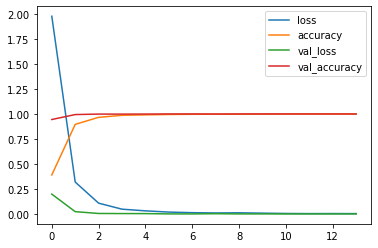

In [ ]:
losses = pd.DataFrame(model.history.history).plot();

In [ ]:
# Evaluate on test_set
scores = model.evaluate(X_test, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 0.0565 - accuracy: 0.9817


In [ ]:
predictions = model.predict(X_test)
predictions

array([[2.9039211e-17, 1.1157929e-16, 7.6109741e-10, ..., 3.2073013e-19,
        9.1525658e-09, 9.0575054e-16],
       [1.8929411e-12, 2.0361584e-12, 1.5764711e-11, ..., 4.4550799e-08,
        5.1807750e-15, 7.1354852e-15],
       [5.1993117e-28, 5.3553431e-19, 3.2221809e-24, ..., 1.3441733e-17,
        3.1806844e-16, 1.6367763e-16],
       ...,
       [1.6599168e-22, 1.0324825e-17, 1.0000000e+00, ..., 1.4459143e-19,
        1.6487205e-16, 8.4562844e-24],
       [4.5989339e-32, 2.1382112e-19, 1.1666017e-22, ..., 4.0574830e-29,
        0.0000000e+00, 0.0000000e+00],
       [8.1846051e-26, 3.1219790e-20, 1.0000000e+00, ..., 4.8072527e-22,
        1.9737398e-18, 1.1810760e-26]], dtype=float32)

In [ ]:
max(predictions[0])

1.0

In [ ]:
y_hat = pd.DataFrame(predictions.argmax(axis=1), 
                                 columns=['Prediction']) 
y_test = pd.DataFrame(y_test, columns=['Label']) 
#eval_df = pd.concat([y_hat,y_test],axis=1)

In [ ]:
from tensorflow.math import confusion_matrix
import seaborn as sns

Text(51.0, 0.5, 'true labels')

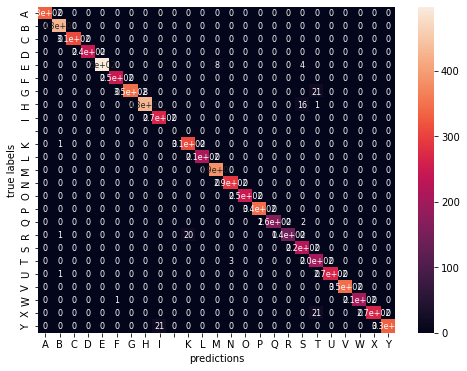

In [ ]:
#confusion_matrix expects 1d arrays, so we convert the dataframe to ndarray 
# and ravel() into 1d
conf_matrix = confusion_matrix(y_hat.to_numpy().ravel(), y_test.to_numpy().ravel())

plt.figure(figsize=(8, 6))
# exclude J + Z
labels = ['A','B','C','D','E','F','G','H','I'," ",'K','L','M','N','O',
          'P','Q','R','S','T','U','V','W','X','Y']
ax = sns.heatmap(conf_matrix, annot=True, xticklabels=labels, yticklabels=labels, annot_kws={"size": 8})
ax.set_xlabel('predictions')
ax.set_ylabel('true labels')

In [ ]:
from sklearn.metrics import f1_score
# average default is 'binary' for binary classification
# for multiclass classification 'micro' means:
# Calculate the total true positives, false negatives 
# and false positives across labels.

#OLD_SCORE: 0.9651
f1_score(y_test, y_hat, average='micro') #--> actual acc + precision of prediction..

0.9817345231455661

#### Fine-tuning prebuilt model (core)

In [24]:
'''

transform the label(letter) to a vector using One-Hot Encoding
label binarizer accepts categorical data and returns an array
'''

from keras import Input
#from keras.utils.np_utils import to_categorical
from tensorflow.keras import callbacks, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models            import Sequential, Model
from keras.layers            import Conv2D, Dropout,MaxPooling2D,Dense, Flatten, Conv2DTranspose,\
Concatenate, BatchNormalization, Activation, GlobalAveragePooling2D

from tensorflow.keras.applications import ResNet50

from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()

In [ ]:

'''
scale data by dividing the pixels by 255
use labelbinazer to categorize the labels
'''

train_tar = labelbinarizer.fit_transform(train_df.label)
test_tar = labelbinarizer.fit_transform(test_df.label)

print(test_tar)
features = train_df.drop('label', axis = 1)/255
test_df.drop('label',axis = 1, inplace = True)

test_x = test_df.values/255

In [13]:
'''
split dataset into train-test
reshape data 
-1 refers to undefinded size 
1 refers to the grey image 
28,28 referes to width and height
'''

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(features, train_tar,
               train_size=0.9, test_size=0.1, random_state=22)


X_train,X_valid = X_train.values.reshape(-1,28,28,1), X_valid.values.reshape(-1,28,28,1)

x_test= test_x.reshape(-1,28,28,1)

In [19]:
print("Features shape", features.shape)
print("Training shape", X_train.shape)
print("Validation shape", X_valid.shape)
print("Testing shape", x_test.shape)


Features shape (7172, 784)
Training shape (6454, 28, 28, 3)
Validation shape (718, 28, 28, 3)
Testing shape (7172, 28, 28, 1)


In [15]:
# Transform the images into "color" (3 channels) for the models transfer learning
X_train = np.stack((X_train[:,:,:,0],)*3, axis =3)
X_valid = np.stack((X_valid[:,:,:,0],)*3, axis =3)
X_test = np.stack((x_test[:,:,:,0],)*3,axis=3)

print("Training shape", X_train.shape)
print("Validation shape", X_valid.shape)
print("Testing shape", x_test.shape)

Training shape (6454, 28, 28, 3)
Validation shape (718, 28, 28, 3)
Testing shape (7172, 28, 28, 1)


In [20]:

'''
- Image generator: performs augmentation
  this helps expand the size of dataset. You can apply any random transformations on each training image as it is passed to the model. 
  This will not only make your model robust but will also save up on the overhead memory
- takes a batch of images used in the training
- applies a series of randon transformations to each image in the batch

'''


train_dataset= ImageDataGenerator( fill_mode='nearest',
                             rotation_range=10,  # 10 degrees
                             zoom_range=0.1,  # 10 %
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False
)



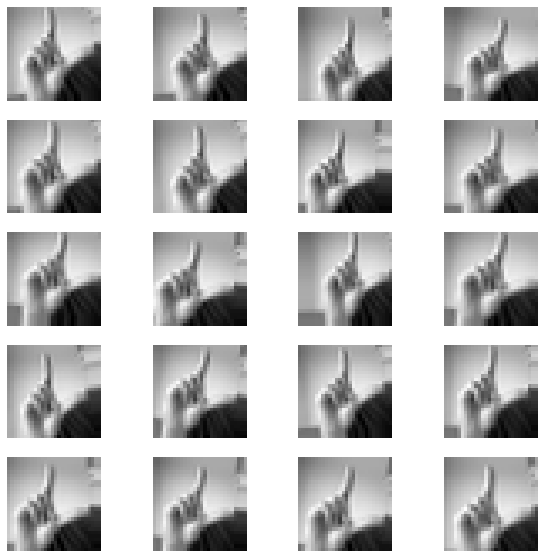

In [ ]:

# resize images to 28,28,3
#pass in a sample of resized data in the dataset
resized_dataset = train_dataset.flow(X_train[1].reshape(-1,28,28,3))

# Plot using a for loop
fig, axes = plt.subplots(5, 4, figsize = (10, 10))
axes = axes.ravel()

for i in range(20):
    aug_img = next(resized_dataset)[0]
    axes[i].imshow(aug_img, cmap = 'gray')
    axes[i].axis("off")
plt.show()

In [33]:

# perform transformation on the training data
image_generator = train_dataset.flow(X_train, y_train, batch_size = 64, shuffle=True)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)


(24709, 28, 28, 3)
(24709, 24)
(2746, 28, 28, 3)
(2746, 24)
(7172, 28, 28, 3)


In [30]:
from tensorflow.keras.applications import ResNet50


'''
function for RESNET pretrained algo
- pass in input shape to create the tensor
- use imagenet which provides a large database of images
- categorizes images into 22000 categories 
- used Global pooling to squeeze the dataset
- dropout to set some inputs to zero
- softmax activation function used for multi level classification



'''

def resnetmodel(input_shape, n_layers):
    input_tensor = Input(shape=input_shape)
    base_model = ResNet50(weights='imagenet', 
                                       include_top=False,
                                       input_tensor=input_tensor)

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_layers, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)

    for layer in model.layers:
        layer.trainable = False

    for i in range(-5, 0):
        model.layers[i].trainable = True

    #optimizer = optimizers.Adam(lr=WARMUP_LEARNING_RATE)
    model.compile(optimizer="adam", loss="categorical_crossentropy",  metrics=["accuracy"])
    
    model.summary

    #losses = pd.DataFrame(model.history.history).plot()



    return model

CUSTOM CNN MODEL
 - UTILIZE MAX POOLING FOR FILTER
 - ADD DROPOUT 
 - 

In [48]:
def CNN_MODEL_CUSTOM(input_shape, n_layers):  
  
    cnn_model = Sequential()

    cnn_model.add(Conv2D(32, (3, 3), input_shape = input_shape, activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(64, (3, 3), input_shape = input_shape, activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(128, (3, 3), input_shape = input_shape, activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())

    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Dense(units = n_layers, activation = 'softmax'))
    
    cnn_model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

    cnn_model.summary



    
    return cnn_model


In [49]:
models = {"resnet": resnetmodel((28,28,3),24),
          " CNN CUSTOM MODEL" : CNN_MODEL_CUSTOM((28,28,3), 24),          
          }



  MODEL: resnet

Epoch 1/50
101/101 [==============================] - 9s 55ms/step - loss: 3.5033 - accuracy: 0.0590 - val_loss: 3.0915 - val_accuracy: 0.1003
Epoch 2/50
101/101 [==============================] - 4s 40ms/step - loss: 3.1629 - accuracy: 0.0789 - val_loss: 3.0637 - val_accuracy: 0.1072
Epoch 3/50
101/101 [==============================] - 4s 41ms/step - loss: 3.1070 - accuracy: 0.0910 - val_loss: 2.9900 - val_accuracy: 0.1643
Epoch 4/50
101/101 [==============================] - 4s 40ms/step - loss: 3.0531 - accuracy: 0.1055 - val_loss: 2.8629 - val_accuracy: 0.1769
Epoch 5/50
101/101 [==============================] - 4s 41ms/step - loss: 3.0242 - accuracy: 0.1105 - val_loss: 2.8580 - val_accuracy: 0.2409
Epoch 6/50
101/101 [==============================] - 4s 41ms/step - loss: 2.9987 - accuracy: 0.1162 - val_loss: 2.8019 - val_accuracy: 0.2103
Epoch 7/50
101/101 [==============================] - 4s 41ms/step - loss: 2.9617 - accuracy: 0.1264 - val_loss: 2.7485 - v

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


101/101 [==============================] - 4s 33ms/step - loss: 3.1613 - accuracy: 0.0634 - val_loss: 3.1522 - val_accuracy: 0.0710
Epoch 2/50
101/101 [==============================] - 3s 31ms/step - loss: 3.1472 - accuracy: 0.0663 - val_loss: 3.1458 - val_accuracy: 0.1031
Epoch 3/50
101/101 [==============================] - 3s 31ms/step - loss: 3.1391 - accuracy: 0.0679 - val_loss: 3.1417 - val_accuracy: 0.1100
Epoch 4/50
101/101 [==============================] - 3s 31ms/step - loss: 3.1299 - accuracy: 0.0713 - val_loss: 3.1316 - val_accuracy: 0.0655
Epoch 5/50
101/101 [==============================] - 3s 32ms/step - loss: 3.1237 - accuracy: 0.0765 - val_loss: 3.1249 - val_accuracy: 0.0738
Epoch 6/50
101/101 [==============================] - 3s 32ms/step - loss: 3.1052 - accuracy: 0.0851 - val_loss: 3.0976 - val_accuracy: 0.1421
Epoch 7/50
101/101 [==============================] - 3s 32ms/step - loss: 3.0699 - accuracy: 0.1013 - val_loss: 3.0515 - val_accuracy: 0.1755
Epoch 8/50

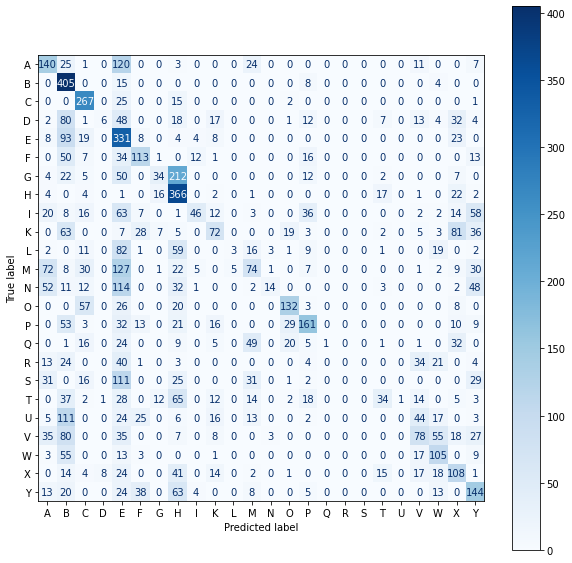

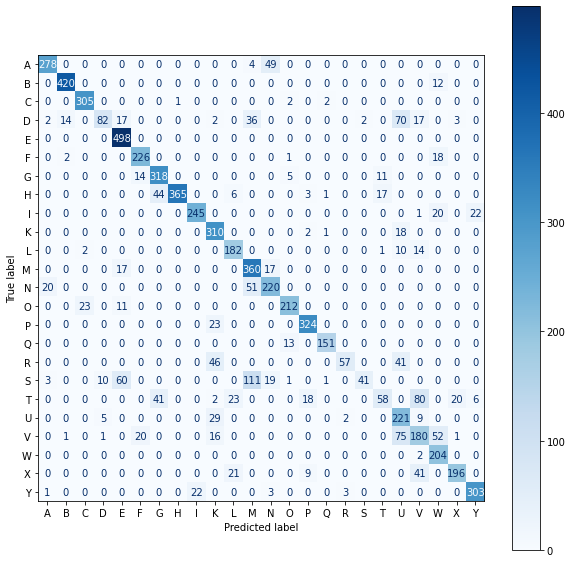

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix

history, metrics = {},{}

# loop through each model 
for model_name, model in models.items():
    print("\n\n  MODEL: {}".format(model_name))
    print("")
    # train the model with the image generator used to randomize the images
    modelhistory = model.fit(image_generator,
                        validation_data = (X_valid, y_valid,), 
                        epochs=50,  
                    )
    # add the model to the history
    history[model_name] = modelhistory
    # use test target to evaluate model
    metrics[model_name] = model.evaluate(X_test, test_tar)

    print("Model Summary.....")
    
    model.summary()



    print("\nPredicting...")
    
    targets = list("ABCDEFGHIKLMNOPQRSTUVWXY")
    
    # use the index associated with the highest value
    y_pred = np.argmax(model.predict(X_test), axis=1)


    print('Confusion Matrix')
    fig, ax = plt.subplots(figsize=(10,10))
    CMP = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.argmax(test_tar, axis=1), y_pred), display_labels=targets).plot(ax=ax,cmap=plt.cm.Blues)
    #CMP.plot(ax=ax)
    #plt.show()
    print('Classification Report')
    print(classification_report(np.argmax(test_tar, axis=1), y_pred, target_names=targets))
    
    print("\nDone\n")



    

resnet
[2.3105850219726562, 0.3672615587711334]


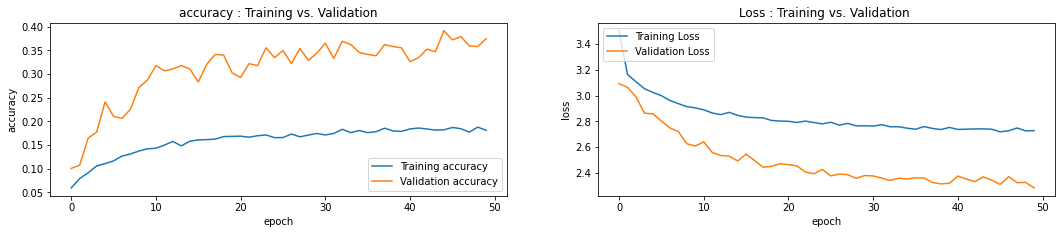

 CNN CUSTOM MODEL
[0.6845977902412415, 0.8025655150413513]


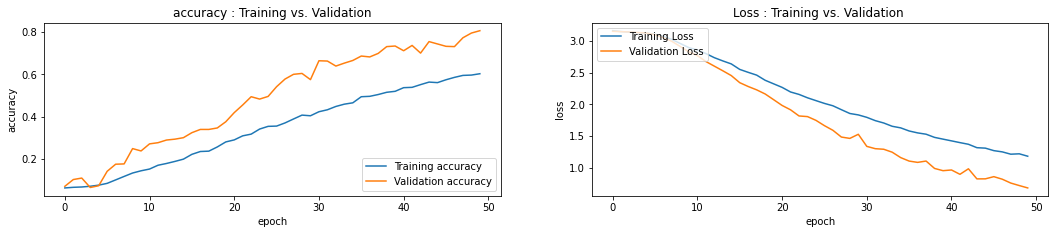

In [51]:

for key in history.keys():
    print(key)
    print(metrics[key])
    
    metric_name = "accuracy"
    plt.figure(figsize=(18, 7))
    plt.subplot(2, 2, 1)
    plt.plot(history[key].history[metric_name], label='Training {}'.format(metric_name))
    plt.plot(history[key].history['val_'+metric_name], label='Validation {}'.format(metric_name))
    plt.xlabel('epoch')
    plt.ylabel(metric_name)
    plt.legend(loc='lower right')
    plt.title('{} : Training vs. Validation'.format(metric_name))

    plt.subplot(2, 2, 2)
    plt.plot(history[key].history['loss'], label='Training Loss')
    plt.plot(history[key].history['val_loss'], label='Validation Loss')
    plt.title('Loss : Training vs. Validation ')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper left')
    plt.show()

*INCEPTION MODEL*

### Save MODEL and weights:

In [ ]:
model.save("SIGN_MNIST_model.h5")
# to download it from Colab to your computer
#from google.colab import files
files.download("SIGN_MNIST_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load model for openCV in google_drive

In [ ]:
#from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#check if mounted correctly
!ls drive/MyDrive/SIC\ Group\ Project/

'AI Capstone Project Final Report.docx'
'Group 4 Final Action Plan.docx'
 models
'PPT Template for Project.pptx'
 screenshots
 Sign_MNIST.ipynb
 sign_mnist_test.csv
 sign_mnist_train.csv
 tutorial_01.ipynb
'Worksheet_Capstone Work Breakdown WBS.xlsx'


In [ ]:
### LOAD MODEL: from google drive
from tensorflow.keras.models import load_model
model = load_model('drive/MyDrive/SIC Group Project/models/SIGN_MNIST_model_SGD.h5')

In [ ]:
drive.flush_and_unmount()
!ls

'imgres?imgurl=https:%2F%2Fpngimg.com%2Fuploads%2Fmario%2Fmario_PNG125.png'
 mario_PNG125.png
 sample_data


### Load model for openCV locally (for openCV video)

In [ ]:
#!pip install gdown

In [ ]:
#for local download
#gdown https://drive.google.com/uc?id=1fy3Z10O83aWiiv2_hYsp97ZALP7dCNy4

In [ ]:
from keras.models import load_model

#load model from THE SAME DIRECTORY Sign_MNIST is in...
#model = load_model(r'C:\Users\abelf\Downloads\music_recommender\audio downloaded\SIGN_MNIST_model_SGD.h5')

### OpenCV Image Post-processing

In [ ]:
import cv2
import time

###### demo-

In [ ]:
class_names = ['A','B','C','D','E','F','G','H','I'," ",'K','L','M','N','O',
          'P','Q','R','S','T','U','V','W','X','Y']
from operator import itemgetter

In [ ]:
#"""
#import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    ret, frame = camera.read()
    if ret:
            assert not isinstance(frame,type(None)), 'frame not found'
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # resize to 128 by 128
    roi = cv2.resize(roi, (128, 128))
    
    # predict!
    roi_X = np.expand_dims(roi, axis=0)

    #roi_X_new = []
    #for image in roi_X:
    #  roi_X_new.append(np.mean(roi_X_new, axis = 2)))
    #roi_X_new = np.array(roi_X_new)

    predictions = model.predict(roi_X)
    #get prediction array
    predict_ = []
    for index, value in enumerate(predictions[0]):
      predict_.append([value, index])
    predict_ = np.array(sorted(np.array(predict_), 
                               key = itemgetter(0), reverse = True))
    
    # get top 3 accuracy + their indices..
    type_1_pred, type_2_pred, type_3_pred = predict_[:3]

    
    # add text
    LABEL_text = 'Prediction: Confidence:'
    cv2.putText(frame, LABEL_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)
    
#supply label index + prediction percentage...
    type_1_text = '{}: {}%'.format(
        class_names[int(type_1_pred[1])], round(float(type_1_pred[0] *100),2))
    cv2.putText(frame, type_1_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    type_2_text = '{}: {}%'.format(
        class_names[int(type_2_pred[1])], round(float(type_2_pred[0] *100), 2))
    cv2.putText(frame, type_2_text, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    type_3_text = '{}: {}%'.format(
        class_names[int(type_3_pred[1])], round(float(type_3_pred[0] *100),2))
    cv2.putText(frame, type_3_text, (70, 260), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()
#"""